In [1]:
# Libraries
import numpy as np
import time
from scipy import integrate, special
import matplotlib.pyplot as plt

# Calculation
From Luminosity calculation:

$L = 2fN_1N_2\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} \rho_1(x, y, z_1(s, s_0)) \rho_2(x, y, z_2(s, s_0))$ dx dy ds d$s_0$\
$ = 2fN_1N_2\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}
\frac{1}{(2\pi)^3(\sigma_x\sigma_y\sigma_z)^2}$exp$(-(\frac{x}{\sigma_x})^2 + (\frac{y}{\sigma_y})^2 + (\frac{s}{\sigma_z})^2 + (\frac{s_0}{\sigma_z})^2)$ dx dy ds d$s_0$\
$ = \frac{fN_1N_2}{4\pi\sigma_x\sigma_y}$

## Hourglass Effect
This assumes constant $\beta$ in s direction since $\sigma_x$ and $\sigma_y$ are kept constant:\
$L_0 = \frac{fN_1N_2}{4\pi\sigma_x\sigma_y}$\
Beta function is at its minimum at the interaction point, approximately a parabolic curve around s:\
$\beta(s) = \beta^*(1 + (\frac{s}{\beta^*})^2)$\
And $\sigma_x$ and y depend on $\beta(s)$ like:\
$\sigma_i(s) = \sqrt{\epsilon_i\beta(s)}$ for $i = x, y$

Do integral where $\sigma_i$ is s dependent:\
$\Longrightarrow 
L = 2fN_1N_2\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}
\frac{1}{(2\pi)^3(\sigma_x(s)\sigma_y(s)\sigma_z)^2}$exp$(-(\frac{x}{\sigma_x(s)})^2 + (\frac{y}{\sigma_y(s)})^2 + (\frac{s}{\sigma_z})^2 + (\frac{s_0}{\sigma_z})^2)$ dx dy ds d$s_0$

$= 2fN_1N_2\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}
\frac{1}{(2\pi)^3\epsilon_x\epsilon_y(\beta^*)^2(1 + (\frac{s}{\beta^*})^2)^2\sigma_z^2}
$exp$(-(\frac{x}{\epsilon_x\beta^*(1 + (\frac{s}{\beta^*})^2)})^2 + (\frac{y}{\epsilon_y\beta^*(1 + (\frac{s}{\beta^*})^2)})^2 + (\frac{s}{\sigma_z})^2 + (\frac{s_0}{\sigma_z})^2)$ dx dy ds d$s_0$

From Fubini's Theorem, we are able to integrate with respect to x, y, and $s_0$ first:\
$= fN_1N_2\int_{-\infty}^{\infty}
\frac{1}{4\pi\sqrt{\epsilon_x\epsilon_y}\beta^*(1 + (\frac{s}{\beta^*})^2)\sigma_z}\frac{1}{\sqrt{\pi}}
$exp$(-(\frac{s}{\sigma_z})^2)$ ds

$\sigma_i$ at IP $(s = 0) = \sqrt{\epsilon_i\beta^*}$\
Then:\
$L = L_0\int_{-\infty}^{\infty}\frac{1}{(1 + (\frac{s}{\beta^*})^2)\sigma_z}\frac{1}{\sqrt{\pi}}
$exp$(-(\frac{s}{\sigma_z})^2)$ ds

Substitutions: $u = \frac{s}{\sigma_z}$ and $u_s = \frac{\beta^*}{\sigma_z}$:\
$\Rightarrow L = L_0\int_{-\infty}^{\infty}\frac{1}{\sqrt{\pi}}\frac{e^{-u^2}}{(1 + (\frac{u}{u_s})^2)}$ du

## 1. Scipy Quad:

In [2]:
#Integrand to evaluate from -inf to inf
def Integrand(u, us):
    return np.exp(-u**2)/(1 + (u/us)**2)/np.sqrt(np.pi)

In [3]:
# Initial conditions
f = 1
N1 = 1
N2 = 1
beta_star = 1
ex = 1
ey = 1
sx = np.sqrt(ex*beta_star)
sy = np.sqrt(ey*beta_star)
sz = 1

In [6]:
# Using Scipy
Luminosity_int = lambda sz, beta_star: integrate.quad(Integrand, -np.inf, np.inf, args = (beta_star/sz))[0]
res = Luminosity_int(sz, beta_star)
L0 = f*N1*N2/(4*np.pi*sx*sy)
print("Normalized Luminosity for beta*/sigma_s = %f:"%(beta_star/sz), res)

Normalized Luminosity for beta*/sigma_s = 1.000000: 0.7578721561413122


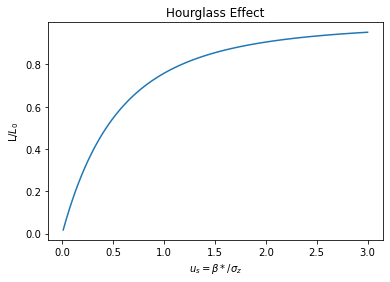

In [11]:
N = 100
Beta_star = np.linspace(1, 300, N + 1)/100
Luminosities = np.zeros(N + 1)
for i, b in enumerate(Beta_star):
    Luminosities[i] = Luminosity_int(1, b)
plt.plot(Beta_star, Luminosities)
plt.title("Hourglass Effect")
plt.ylabel(r"L/$L_0$")
plt.xlabel(r"$u_s = \beta*/\sigma_z$")
plt.show()

For $u_s = \frac{\beta^*}{\sigma_z} >> 1$, hourglass effect vanishes since integral approaches 1

## 2. Analytical Solution:
$L = L_0u_se^{u_s^2}\pi(\frac{u_s}{|u_s|} - 1 +$ erfc$(u_s))$

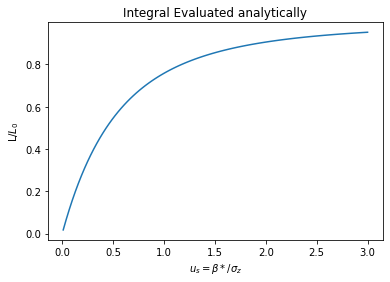

In [12]:
Luminosity_int_true = lambda u_s: u_s*np.exp(u_s**2)*(u_s/np.abs(u_s) - 1 + special.erfc(u_s))*(np.sqrt(np.pi))
Luminosities_true = np.zeros(N + 1)
for i, b in enumerate(Beta_star):
    Luminosities_true[i] = Luminosity_int_true(b)
plt.plot(Beta_star, Luminosities_true)
plt.title("Integral Evaluated analytically")
plt.ylabel(r"L/$L_0$")
plt.xlabel(r"$u_s = \beta*/\sigma_z$")
plt.show()